In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Reshape, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [2]:
data = pd.read_csv("./data/all_counts_9_norm_rpkm.csv", index_col=0, usecols=["gene", "BB9", "BB10", "BB17",
                                                                              "BB19", "BB20", "BB21",
                                                                              "BB11", "BB12", "BB18"])
print("Tamanho dos dados:", data.shape)
data.head()

Tamanho dos dados: (4293, 9)


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,45.6132,57.7381,35.4817,71.4413,75.5846,59.6099,93.7032,78.2685,75.4577
aaeB,48.4527,42.2968,41.1391,44.0555,47.6292,51.5953,56.3065,69.1718,58.5695
aaeR,49.0572,53.1486,33.4681,55.6848,43.8708,64.5169,51.3741,77.9266,79043.0000
aaeX,66.7322,64.9632,64.3814,81.0705,52586.0000,69.0053,64.9201,69.2443,56966.0000
aas,73.7846,77.6379,77.6300,65.1203,64.7268,77.6184,77.5343,95.9067,93.9019


In [3]:
data = np.log2(data+1)

In [4]:
rg = open("./data/reference_genes.txt", "r", newline="\n")
hkg = [i for i in rg.read().splitlines()]
print("Quantidade de genes housekeeping:", len(hkg))
print(hkg)

Quantidade de genes housekeeping: 21
['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [5]:
hkg_data = data.loc[hkg]

In [6]:
hkg_data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
idnT,6.061372,6.093678,6.077117,6.325967,6.015319,6.587866,6.507484,16.668359,16.724794
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799


In [7]:
data.columns.values

array(['BB9', 'BB10', 'BB17', 'BB19', 'BB20', 'BB21', 'BB11', 'BB12',
       'BB18'], dtype=object)

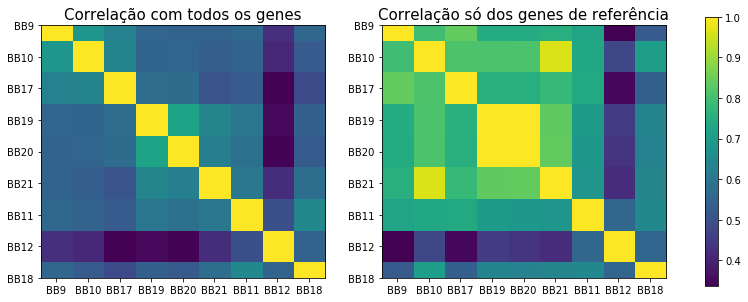

In [8]:
fig, axes = plt.subplots(1,2, figsize=(14, 8))
cm = axes[0].imshow(data.corr())
axes[0].set_title("Correlação com todos os genes", fontsize=15)
axes[0].set_xticks(np.arange(9))
axes[0].set_xticklabels(data.columns.values)
axes[0].set_yticks(np.arange(9))
axes[0].set_yticklabels(data.columns.values)

axes[1].imshow(hkg_data.corr())
axes[1].set_title("Correlação só dos genes de referência", fontsize=15)
axes[1].set_xticks(np.arange(9))
axes[1].set_xticklabels(hkg_data.columns.values)
axes[1].set_yticks(np.arange(9))
axes[1].set_yticklabels(hkg_data.columns.values)

fig.colorbar(cm, ax=axes.ravel().tolist(), shrink=.62)
plt.show()


In [9]:
for idx, vals in hkg_data.iterrows():
    print(idx, np.std(vals)/np.mean(vals))

cysG 0.047510330894395825
hcaT 0.034282436941015654
idnT 0.5082800362135752
rrsA 0.08274603355028991
ihfB 0.07550553167722314
ssrA 0.052812539574405244
gyrA 0.1593059342197117
recA 0.22872084846542823
rpoB 0.2935911425658469
rpoA 0.18868773605291764
gyrB 0.19799310052122365
rho 0.29599030526449727
ftsZ 0.03718694477894635
secA 0.20738773919228934
rpoC 0.044124249004606285
gmk 0.02402531796880816
adk 0.03399753444494476
rpoD 0.18407738946242252
dnaG 0.20048677275570292
glnA 0.2707966507718216
recF 0.4188544734596423


In [10]:
c = 0
for idx,vals in data.iterrows():
    if (np.std(vals)/np.mean(vals)) > 0.2:
        c += 1
print(c)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


2904


In [11]:
max_val = 1
min_val = -1
min_train = np.min(hkg_data)
max_train = np.max(hkg_data)
X_train = ((hkg_data - min_train)/(max_train - min_train))*(max_val - min_val) + min_val
X_train

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-0.999813,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959389,-1.000000,-1.000000,-1.000000,-1.000000
idnT,-0.946080,-0.948025,-0.944276,-0.914840,-1.000000,-0.930703,-0.942743,0.562604,0.575625
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.154926,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044301,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266177,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265186,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985678,0.886011,-0.662111,0.593895,0.772322


In [211]:
data = ((data - min_train)/(max_train - min_train))*(max_val - min_val) + min_val
data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,-1.021960,-0.979435,-1.070980,-0.936075,-0.964066,-1.031994,-0.934337,-0.939543,-0.937269
aaeB,-1.009480,-1.042995,-1.041304,-1.034891,-1.060696,-1.063096,-1.039629,-0.965042,-0.989310
aaeR,-1.006916,-0.996388,-1.082667,-0.987112,-1.077810,-1.014922,-1.058494,-0.940447,0.509951
aaeX,-0.943096,-0.955260,-0.950883,-0.910106,0.425654,-1.000392,-1.010278,-0.964826,0.441659
aas,-0.922192,-0.918634,-0.912901,-0.955073,-0.996595,-0.974946,-0.973578,-0.897515,-0.892211
...,...,...,...,...,...,...,...,...,...
zraR,-1.073748,-1.153982,-1.150891,-1.137953,-1.132580,-1.105349,-1.116639,-1.037092,-1.073255
zraS,-1.031483,-1.113467,-1.079660,-1.046629,-1.133967,-1.096935,0.425981,-1.018809,-1.047886
zupT,-0.722573,0.721750,0.753271,0.759741,0.757678,0.733104,0.654379,0.607526,0.687909


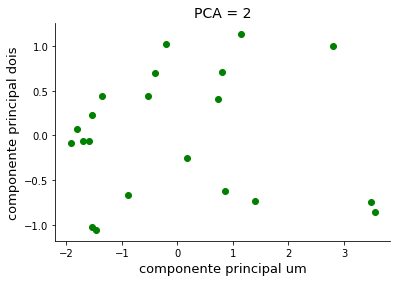

In [212]:
pca_real = PCA(n_components=2)
X_train_pca = pca_real.fit_transform(X_train)
fig = plt.figure()
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("PCA = 2", fontsize=14)
plt.xlabel("componente principal um", fontsize=13)
plt.ylabel("componente principal dois", fontsize=13)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="green");

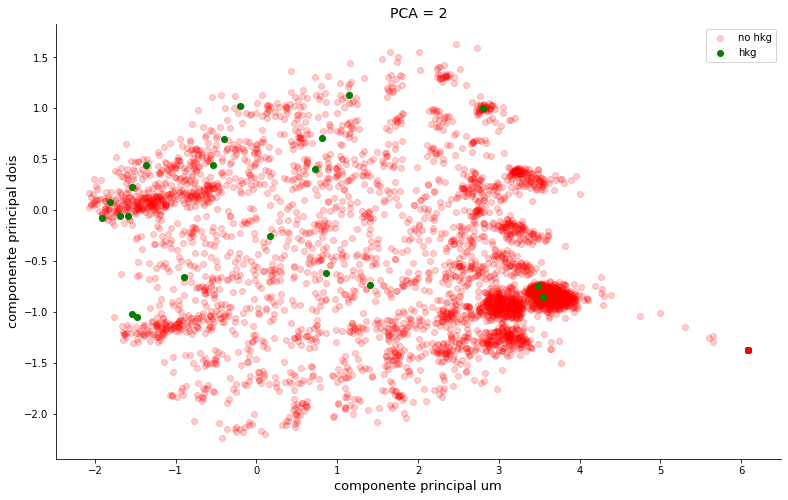

In [215]:
pca_real = PCA(n_components=2)
X_train_pca = pca_real.fit_transform(X_train)
datos_pca = pca_real.transform(data)
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("PCA = 2", fontsize=14)
plt.xlabel("componente principal um", fontsize=13)
plt.ylabel("componente principal dois", fontsize=13)
plt.scatter(datos_pca[:,0], datos_pca[:,1], alpha=.2, color="red", label="no hkg")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="green", label="hkg")
plt.legend();

In [216]:
class Generator():
    def __init__(self, noise_input, out_dim, optimizerG):
        self.noise_input = noise_input
        self.out_dim = out_dim
        self.optimizerG = optimizerG
        
    def generator(self):
        """
        noise_input: vector con los datos de la distribuición inicial
        out_dim: dimension de la salida esperada, por ejemplo si es una imagen
                 en escala de gris, sería out_dim: (32,32,1)
        Retorna el modelo Generador
        """
        model = Sequential()
        model.add(Dense(250, input_shape=(self.noise_input,)))
        model.add(Dense(250))
        model.add(Dense(250))
        model.add(Dense(np.prod(self.out_dim), activation="tanh"))
        model.add(Reshape(self.out_dim))
        return model
    
    def compileG(self):
        Gr = self.generator()
        Gr.compile(loss="binary_crossentropy", optimizer= self.optimizerG)
        return Gr

In [217]:
noise_input = 100
optimizerG = Adam(lr=0.0001, beta_1=0.5)
obj_G = Generator(noise_input, (9,), optimizerG)
print("Dimension del ruido de entrada: ",noise_input)
G = obj_G.compileG()

Dimension del ruido de entrada:  100
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [218]:
noise = np.random.normal(loc=0, scale=1, size=(X_train.shape[0],noise_input))
print("Dimension de los datos de entrada:", noise.shape)
data_fake = G.predict(noise)
print("Dimension de los ejemplos generados:", data_fake.shape)

Dimension de los datos de entrada: (21, 100)
Dimension de los ejemplos generados: (21, 9)


Distribuición original de cada caracteristica vs red Generadora sin entrenar


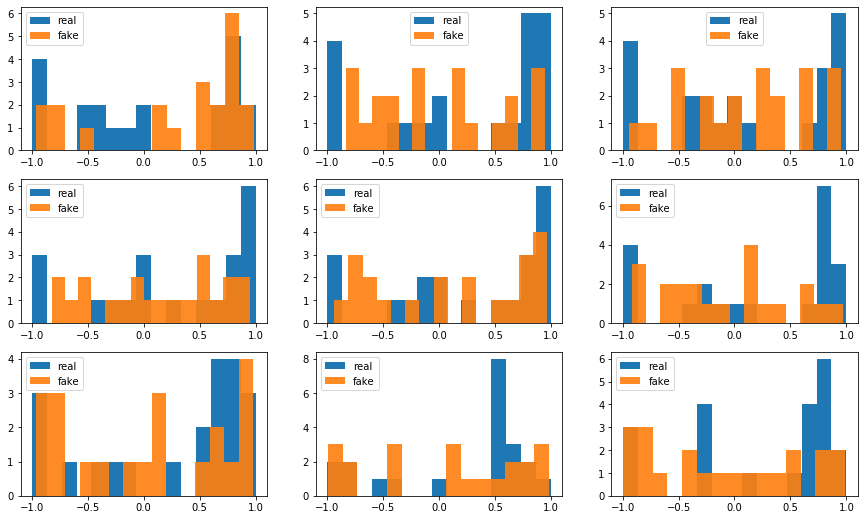

In [221]:
plt.figure(figsize=(15,9))
print("Distribuición original de cada caracteristica vs red Generadora sin entrenar")
for col in range(X_train.shape[1]):
    aux_real = X_train.iloc[:,col]
    aux_fake = data_fake[:,col]
    plt.subplot(3,3,col+1)
    plt.hist(aux_real, bins=15, label="real",)
    plt.hist(aux_fake, bins=15, label="fake", alpha=0.9)
    plt.legend()

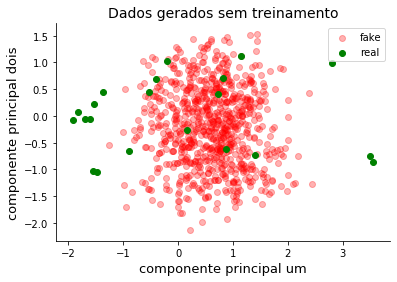

In [222]:
noise = np.random.normal(loc=0, scale=1, size=(800,noise_input))
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.title("Dados gerados sem treinamento", fontsize=14)
plt.xlabel("componente principal um", fontsize=13)
plt.ylabel("componente principal dois", fontsize=13)
x_noise = G.predict(noise)
X_fake_pca = pca_real.transform(x_noise)
plt.scatter(X_fake_pca[:,0], X_fake_pca[:,1], color="red", label="fake", alpha=.3)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="green", label="real", alpha=1)
plt.legend();

In [223]:
class Discriminator():
    
    def __init__(self, input_dim, optimizerD):
        self.input_dim = input_dim
        self.optimizerD = optimizerD
    
    def discriminator(self):
        """
        input_dim: dimension de los datos de entrada,
                   por ejemplo si es una imagen en escala de gris,
                   sería input_dim: (32,32,1)
        """
        model = Sequential()
        model.add(Dense(32, input_shape=self.input_dim))
        model.add(LeakyReLU(alpha=0.2)) #función rectificadora
        model.add(Dropout(.1))
        model.add(Flatten())
        #activación sigmoid ya que se precisa establecer si es 0 ó 1.
        model.add(Dense(1, activation='sigmoid'))
        return model
    
    def compileD(self):
        Dr = self.discriminator()
        Dr.compile(loss="binary_crossentropy", optimizer=optimizerD, metrics=["accuracy"])
        return Dr

In [224]:
optimizerD = Adam(lr=0.0001, beta_1=0.5)
objD = Discriminator((X_train.shape[1],), optimizerD)
D = objD.compileD()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [225]:
def Gan(generator, discriminator):
    """
    recibe como parámetros de entrada las redes
    generador y discriminador
    """
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False #no se actualizan los pesos
    model.add(discriminator)
    return model

In [226]:
def get_batches(X_train, batch_size):
    """
    X_train: dataset para o treino
    epochs: quantidade de epocas para o treino do gradiente
    batch: tamanho to batch pra o treino de cada epochs
    """
    batches = []
    num_bat = int(np.ceil(X_train.shape[0]/batch_size))
    lim_i = 0
    lim_s = batch_size
    for i in range(num_bat):
        if lim_s > X_train.shape[0]:
            lim_s = X_train.shape[0]
        batches.append(X_train[lim_i:lim_s])
        lim_i += batch_size
        lim_s += batch_size
    return batches

In [227]:
#treinamento da GAN
def train(X_train, epochs, batch_size, G, D, gan, noise_input):
    g_loss = []
    d_loss = []
    for epoch in range(epochs):
        batches = get_batches(X_train, batch_size)
        count_b = 0
        t_i = time()
        d_bacth_loss = []
        g_bacth_loss = []
        for batch in batches:
            gen_noise = np.random.normal(0, 1, (np.int64(batch.shape[0]), noise_input))
            #gerando as imagens fake
            syntetic_data = G.predict(gen_noise)
            #criação do array de treinamento
            x_combined_batch = np.concatenate((batch, syntetic_data))
            y_combined_batch = np.concatenate((np.ones((batch.shape[0], 1)),
                                               np.zeros((batch.shape[0], 1))))
            #misturar os dados
            #x_combined_batch, y_combined_batch = shuffle(x_combined_batch, y_combined_batch)
            #treino do discriminador
            d_bacth_loss.append(D.train_on_batch(x_combined_batch, y_combined_batch)[0])
            # train generator
            noise = np.random.normal(0, 1, (batch.shape[0], noise_input))
            y_mislabled = np.ones((batch.shape[0], 1))
            g_bacth_loss.append(gan.train_on_batch(noise, y_mislabled))
        t_f = time()
        t = t_f - t_i
        t_i = time()
        #d_loss.append(np.mean(np.array(d_bacth_loss)))
        #g_loss.append(np.mean(np.array(g_bacth_loss)))
        d_loss.append(d_bacth_loss[-1])
        g_loss.append(g_bacth_loss[-1])
        print ('epoch:[%d/%d] [Discriminator::d_loss: %f],[Generator::loss: %f], %f[sec]'
                   % (epoch+1, epochs, d_loss[-1], g_loss[-1], t))
    return g_loss, d_loss


In [255]:
noise_input = 7
#Gerador
#optimizerG = Adam(lr=0.0001, beta_1=0.4)
optimizerG = SGD(lr=0.0005, momentum=0.9, decay=0.0005/1200)
obj_G = Generator(noise_input, (X_train.shape[1],), optimizerG)
print("Dimension del ruido de entrada: ",noise_input)
G = obj_G.compileG()
# Discriminador
#optimizerD = Adam(lr=0.002, beta_1=0.9)
optimizerD = SGD(lr=0.01, momentum=0.9, decay=0.01/1200)
objD = Discriminator((X_train.shape[1],), optimizerD)
D = objD.compileD()

gan = Gan(G,D)
gan.compile(loss='binary_crossentropy', optimizer=optimizerG)
gan.summary()

Dimension del ruido de entrada:  7
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (None, 9)                 129759    
_________________________________________________________________
sequential_21 (Sequential)   (None, 1)                 353       
Total params: 130,112
Trainable params: 129,759
Non-trainable params: 353
_________________________________________________________________


In [256]:
ep = 1200
g_loss, d_loss = train(X_train, epochs=ep, batch_size=X_train.shape[0],
                       G=G, D=D, gan=gan, noise_input=noise_input)

epoch:[1/1200] [Discriminator::d_loss: 0.724243],[Generator::loss: 0.739724], 1.986426[sec]
epoch:[2/1200] [Discriminator::d_loss: 0.686450],[Generator::loss: 0.699887], 0.006171[sec]
epoch:[3/1200] [Discriminator::d_loss: 0.694829],[Generator::loss: 0.707924], 0.006044[sec]
epoch:[4/1200] [Discriminator::d_loss: 0.722165],[Generator::loss: 0.699341], 0.005952[sec]
epoch:[5/1200] [Discriminator::d_loss: 0.701412],[Generator::loss: 0.737006], 0.005988[sec]
epoch:[6/1200] [Discriminator::d_loss: 0.710704],[Generator::loss: 0.707598], 0.006013[sec]
epoch:[7/1200] [Discriminator::d_loss: 0.699048],[Generator::loss: 0.662867], 0.005985[sec]
epoch:[8/1200] [Discriminator::d_loss: 0.686085],[Generator::loss: 0.656984], 0.006023[sec]
epoch:[9/1200] [Discriminator::d_loss: 0.687485],[Generator::loss: 0.713637], 0.006146[sec]
epoch:[10/1200] [Discriminator::d_loss: 0.669875],[Generator::loss: 0.695859], 0.006104[sec]
epoch:[11/1200] [Discriminator::d_loss: 0.714997],[Generator::loss: 0.646541], 

epoch:[93/1200] [Discriminator::d_loss: 0.548901],[Generator::loss: 0.879496], 0.006544[sec]
epoch:[94/1200] [Discriminator::d_loss: 0.579208],[Generator::loss: 0.850038], 0.007403[sec]
epoch:[95/1200] [Discriminator::d_loss: 0.571150],[Generator::loss: 0.828338], 0.007387[sec]
epoch:[96/1200] [Discriminator::d_loss: 0.574988],[Generator::loss: 0.862098], 0.009311[sec]
epoch:[97/1200] [Discriminator::d_loss: 0.608217],[Generator::loss: 0.880889], 0.006679[sec]
epoch:[98/1200] [Discriminator::d_loss: 0.569012],[Generator::loss: 0.821663], 0.006437[sec]
epoch:[99/1200] [Discriminator::d_loss: 0.561641],[Generator::loss: 0.722400], 0.006431[sec]
epoch:[100/1200] [Discriminator::d_loss: 0.565444],[Generator::loss: 0.874659], 0.006016[sec]
epoch:[101/1200] [Discriminator::d_loss: 0.570308],[Generator::loss: 0.870147], 0.005952[sec]
epoch:[102/1200] [Discriminator::d_loss: 0.624324],[Generator::loss: 0.824090], 0.006048[sec]
epoch:[103/1200] [Discriminator::d_loss: 0.582008],[Generator::loss

epoch:[182/1200] [Discriminator::d_loss: 0.673876],[Generator::loss: 0.746549], 0.008270[sec]
epoch:[183/1200] [Discriminator::d_loss: 0.690755],[Generator::loss: 0.898559], 0.009548[sec]
epoch:[184/1200] [Discriminator::d_loss: 0.716380],[Generator::loss: 0.804879], 0.007784[sec]
epoch:[185/1200] [Discriminator::d_loss: 0.672650],[Generator::loss: 0.829248], 0.006448[sec]
epoch:[186/1200] [Discriminator::d_loss: 0.714452],[Generator::loss: 0.783020], 0.006100[sec]
epoch:[187/1200] [Discriminator::d_loss: 0.697224],[Generator::loss: 0.872065], 0.005968[sec]
epoch:[188/1200] [Discriminator::d_loss: 0.703932],[Generator::loss: 0.947318], 0.006212[sec]
epoch:[189/1200] [Discriminator::d_loss: 0.694682],[Generator::loss: 0.944152], 0.006022[sec]
epoch:[190/1200] [Discriminator::d_loss: 0.666975],[Generator::loss: 0.833906], 0.006005[sec]
epoch:[191/1200] [Discriminator::d_loss: 0.711725],[Generator::loss: 0.822135], 0.005916[sec]
epoch:[192/1200] [Discriminator::d_loss: 0.617126],[Generato

epoch:[275/1200] [Discriminator::d_loss: 0.684233],[Generator::loss: 0.782466], 0.006570[sec]
epoch:[276/1200] [Discriminator::d_loss: 0.683367],[Generator::loss: 0.823775], 0.007179[sec]
epoch:[277/1200] [Discriminator::d_loss: 0.648710],[Generator::loss: 0.816670], 0.008391[sec]
epoch:[278/1200] [Discriminator::d_loss: 0.677177],[Generator::loss: 0.851105], 0.006398[sec]
epoch:[279/1200] [Discriminator::d_loss: 0.671576],[Generator::loss: 0.860795], 0.006985[sec]
epoch:[280/1200] [Discriminator::d_loss: 0.670235],[Generator::loss: 0.736931], 0.006182[sec]
epoch:[281/1200] [Discriminator::d_loss: 0.671745],[Generator::loss: 0.787606], 0.006143[sec]
epoch:[282/1200] [Discriminator::d_loss: 0.682611],[Generator::loss: 0.778906], 0.006079[sec]
epoch:[283/1200] [Discriminator::d_loss: 0.659641],[Generator::loss: 0.740871], 0.005853[sec]
epoch:[284/1200] [Discriminator::d_loss: 0.672993],[Generator::loss: 0.833382], 0.006067[sec]
epoch:[285/1200] [Discriminator::d_loss: 0.657701],[Generato

epoch:[368/1200] [Discriminator::d_loss: 0.695198],[Generator::loss: 0.802843], 0.006138[sec]
epoch:[369/1200] [Discriminator::d_loss: 0.662087],[Generator::loss: 0.775237], 0.011093[sec]
epoch:[370/1200] [Discriminator::d_loss: 0.661924],[Generator::loss: 0.786295], 0.008173[sec]
epoch:[371/1200] [Discriminator::d_loss: 0.650820],[Generator::loss: 0.757785], 0.006020[sec]
epoch:[372/1200] [Discriminator::d_loss: 0.671491],[Generator::loss: 0.746275], 0.006233[sec]
epoch:[373/1200] [Discriminator::d_loss: 0.671426],[Generator::loss: 0.803481], 0.006224[sec]
epoch:[374/1200] [Discriminator::d_loss: 0.637319],[Generator::loss: 0.757212], 0.005881[sec]
epoch:[375/1200] [Discriminator::d_loss: 0.638517],[Generator::loss: 0.796535], 0.006146[sec]
epoch:[376/1200] [Discriminator::d_loss: 0.634992],[Generator::loss: 0.765747], 0.006025[sec]
epoch:[377/1200] [Discriminator::d_loss: 0.626231],[Generator::loss: 0.765564], 0.005977[sec]
epoch:[378/1200] [Discriminator::d_loss: 0.658786],[Generato

epoch:[461/1200] [Discriminator::d_loss: 0.726632],[Generator::loss: 0.791987], 0.007002[sec]
epoch:[462/1200] [Discriminator::d_loss: 0.674723],[Generator::loss: 0.852118], 0.009671[sec]
epoch:[463/1200] [Discriminator::d_loss: 0.667486],[Generator::loss: 0.695569], 0.007414[sec]
epoch:[464/1200] [Discriminator::d_loss: 0.680814],[Generator::loss: 0.796251], 0.006184[sec]
epoch:[465/1200] [Discriminator::d_loss: 0.657849],[Generator::loss: 0.783507], 0.006323[sec]
epoch:[466/1200] [Discriminator::d_loss: 0.677800],[Generator::loss: 0.749740], 0.006289[sec]
epoch:[467/1200] [Discriminator::d_loss: 0.718935],[Generator::loss: 0.762851], 0.007153[sec]
epoch:[468/1200] [Discriminator::d_loss: 0.682151],[Generator::loss: 0.712102], 0.006519[sec]
epoch:[469/1200] [Discriminator::d_loss: 0.686883],[Generator::loss: 0.728051], 0.006100[sec]
epoch:[470/1200] [Discriminator::d_loss: 0.728830],[Generator::loss: 0.773496], 0.006043[sec]
epoch:[471/1200] [Discriminator::d_loss: 0.669358],[Generato

epoch:[554/1200] [Discriminator::d_loss: 0.660223],[Generator::loss: 0.725715], 0.007032[sec]
epoch:[555/1200] [Discriminator::d_loss: 0.683528],[Generator::loss: 0.722855], 0.007857[sec]
epoch:[556/1200] [Discriminator::d_loss: 0.698704],[Generator::loss: 0.725843], 0.008342[sec]
epoch:[557/1200] [Discriminator::d_loss: 0.659774],[Generator::loss: 0.731263], 0.006571[sec]
epoch:[558/1200] [Discriminator::d_loss: 0.669262],[Generator::loss: 0.685581], 0.005990[sec]
epoch:[559/1200] [Discriminator::d_loss: 0.680313],[Generator::loss: 0.748829], 0.006284[sec]
epoch:[560/1200] [Discriminator::d_loss: 0.688026],[Generator::loss: 0.789921], 0.006309[sec]
epoch:[561/1200] [Discriminator::d_loss: 0.666546],[Generator::loss: 0.720613], 0.007221[sec]
epoch:[562/1200] [Discriminator::d_loss: 0.672982],[Generator::loss: 0.720934], 0.006356[sec]
epoch:[563/1200] [Discriminator::d_loss: 0.676963],[Generator::loss: 0.763810], 0.006176[sec]
epoch:[564/1200] [Discriminator::d_loss: 0.686730],[Generato

epoch:[647/1200] [Discriminator::d_loss: 0.666740],[Generator::loss: 0.683994], 0.008723[sec]
epoch:[648/1200] [Discriminator::d_loss: 0.677111],[Generator::loss: 0.740212], 0.008207[sec]
epoch:[649/1200] [Discriminator::d_loss: 0.687310],[Generator::loss: 0.743519], 0.005983[sec]
epoch:[650/1200] [Discriminator::d_loss: 0.657650],[Generator::loss: 0.748275], 0.006482[sec]
epoch:[651/1200] [Discriminator::d_loss: 0.660052],[Generator::loss: 0.682915], 0.006140[sec]
epoch:[652/1200] [Discriminator::d_loss: 0.669971],[Generator::loss: 0.752263], 0.006058[sec]
epoch:[653/1200] [Discriminator::d_loss: 0.711022],[Generator::loss: 0.738220], 0.006351[sec]
epoch:[654/1200] [Discriminator::d_loss: 0.650799],[Generator::loss: 0.727622], 0.006327[sec]
epoch:[655/1200] [Discriminator::d_loss: 0.682333],[Generator::loss: 0.747467], 0.006343[sec]
epoch:[656/1200] [Discriminator::d_loss: 0.659239],[Generator::loss: 0.762147], 0.006208[sec]
epoch:[657/1200] [Discriminator::d_loss: 0.708114],[Generato

epoch:[740/1200] [Discriminator::d_loss: 0.663499],[Generator::loss: 0.747325], 0.007430[sec]
epoch:[741/1200] [Discriminator::d_loss: 0.694914],[Generator::loss: 0.702080], 0.008689[sec]
epoch:[742/1200] [Discriminator::d_loss: 0.679830],[Generator::loss: 0.742141], 0.006210[sec]
epoch:[743/1200] [Discriminator::d_loss: 0.668581],[Generator::loss: 0.751567], 0.006099[sec]
epoch:[744/1200] [Discriminator::d_loss: 0.674819],[Generator::loss: 0.739426], 0.006344[sec]
epoch:[745/1200] [Discriminator::d_loss: 0.684041],[Generator::loss: 0.722150], 0.006073[sec]
epoch:[746/1200] [Discriminator::d_loss: 0.698542],[Generator::loss: 0.707443], 0.006141[sec]
epoch:[747/1200] [Discriminator::d_loss: 0.688725],[Generator::loss: 0.763572], 0.005967[sec]
epoch:[748/1200] [Discriminator::d_loss: 0.664597],[Generator::loss: 0.747941], 0.005989[sec]
epoch:[749/1200] [Discriminator::d_loss: 0.711233],[Generator::loss: 0.679591], 0.008034[sec]
epoch:[750/1200] [Discriminator::d_loss: 0.677651],[Generato

epoch:[833/1200] [Discriminator::d_loss: 0.668257],[Generator::loss: 0.760870], 0.006263[sec]
epoch:[834/1200] [Discriminator::d_loss: 0.637093],[Generator::loss: 0.719844], 0.007576[sec]
epoch:[835/1200] [Discriminator::d_loss: 0.644473],[Generator::loss: 0.721324], 0.007688[sec]
epoch:[836/1200] [Discriminator::d_loss: 0.667597],[Generator::loss: 0.722983], 0.006448[sec]
epoch:[837/1200] [Discriminator::d_loss: 0.671016],[Generator::loss: 0.711833], 0.006049[sec]
epoch:[838/1200] [Discriminator::d_loss: 0.664447],[Generator::loss: 0.730235], 0.006489[sec]
epoch:[839/1200] [Discriminator::d_loss: 0.669307],[Generator::loss: 0.749883], 0.006148[sec]
epoch:[840/1200] [Discriminator::d_loss: 0.696081],[Generator::loss: 0.693523], 0.006198[sec]
epoch:[841/1200] [Discriminator::d_loss: 0.638405],[Generator::loss: 0.673524], 0.006300[sec]
epoch:[842/1200] [Discriminator::d_loss: 0.710601],[Generator::loss: 0.781191], 0.006154[sec]
epoch:[843/1200] [Discriminator::d_loss: 0.676614],[Generato

epoch:[925/1200] [Discriminator::d_loss: 0.615121],[Generator::loss: 0.776904], 0.006072[sec]
epoch:[926/1200] [Discriminator::d_loss: 0.665218],[Generator::loss: 0.734658], 0.008601[sec]
epoch:[927/1200] [Discriminator::d_loss: 0.623690],[Generator::loss: 0.749601], 0.008683[sec]
epoch:[928/1200] [Discriminator::d_loss: 0.645082],[Generator::loss: 0.731324], 0.006020[sec]
epoch:[929/1200] [Discriminator::d_loss: 0.647242],[Generator::loss: 0.733241], 0.006351[sec]
epoch:[930/1200] [Discriminator::d_loss: 0.658348],[Generator::loss: 0.769680], 0.006072[sec]
epoch:[931/1200] [Discriminator::d_loss: 0.653787],[Generator::loss: 0.780488], 0.006167[sec]
epoch:[932/1200] [Discriminator::d_loss: 0.632278],[Generator::loss: 0.763140], 0.006556[sec]
epoch:[933/1200] [Discriminator::d_loss: 0.675270],[Generator::loss: 0.767495], 0.006106[sec]
epoch:[934/1200] [Discriminator::d_loss: 0.650822],[Generator::loss: 0.760698], 0.006133[sec]
epoch:[935/1200] [Discriminator::d_loss: 0.646538],[Generato

epoch:[1018/1200] [Discriminator::d_loss: 0.686652],[Generator::loss: 0.789451], 0.006464[sec]
epoch:[1019/1200] [Discriminator::d_loss: 0.671449],[Generator::loss: 0.718811], 0.008231[sec]
epoch:[1020/1200] [Discriminator::d_loss: 0.667469],[Generator::loss: 0.813868], 0.007990[sec]
epoch:[1021/1200] [Discriminator::d_loss: 0.644645],[Generator::loss: 0.749964], 0.006304[sec]
epoch:[1022/1200] [Discriminator::d_loss: 0.631636],[Generator::loss: 0.738799], 0.006158[sec]
epoch:[1023/1200] [Discriminator::d_loss: 0.647514],[Generator::loss: 0.719312], 0.006245[sec]
epoch:[1024/1200] [Discriminator::d_loss: 0.635583],[Generator::loss: 0.758876], 0.006228[sec]
epoch:[1025/1200] [Discriminator::d_loss: 0.672817],[Generator::loss: 0.790198], 0.006100[sec]
epoch:[1026/1200] [Discriminator::d_loss: 0.654680],[Generator::loss: 0.762951], 0.006001[sec]
epoch:[1027/1200] [Discriminator::d_loss: 0.636442],[Generator::loss: 0.778999], 0.006540[sec]
epoch:[1028/1200] [Discriminator::d_loss: 0.655979

epoch:[1110/1200] [Discriminator::d_loss: 0.675872],[Generator::loss: 0.744093], 0.007545[sec]
epoch:[1111/1200] [Discriminator::d_loss: 0.647949],[Generator::loss: 0.709679], 0.007456[sec]
epoch:[1112/1200] [Discriminator::d_loss: 0.668204],[Generator::loss: 0.848985], 0.007637[sec]
epoch:[1113/1200] [Discriminator::d_loss: 0.697974],[Generator::loss: 0.733722], 0.006192[sec]
epoch:[1114/1200] [Discriminator::d_loss: 0.650123],[Generator::loss: 0.802155], 0.006118[sec]
epoch:[1115/1200] [Discriminator::d_loss: 0.667418],[Generator::loss: 0.716591], 0.006420[sec]
epoch:[1116/1200] [Discriminator::d_loss: 0.676878],[Generator::loss: 0.730953], 0.005943[sec]
epoch:[1117/1200] [Discriminator::d_loss: 0.658510],[Generator::loss: 0.732609], 0.006173[sec]
epoch:[1118/1200] [Discriminator::d_loss: 0.692880],[Generator::loss: 0.757658], 0.006023[sec]
epoch:[1119/1200] [Discriminator::d_loss: 0.651787],[Generator::loss: 0.760132], 0.006065[sec]
epoch:[1120/1200] [Discriminator::d_loss: 0.662510

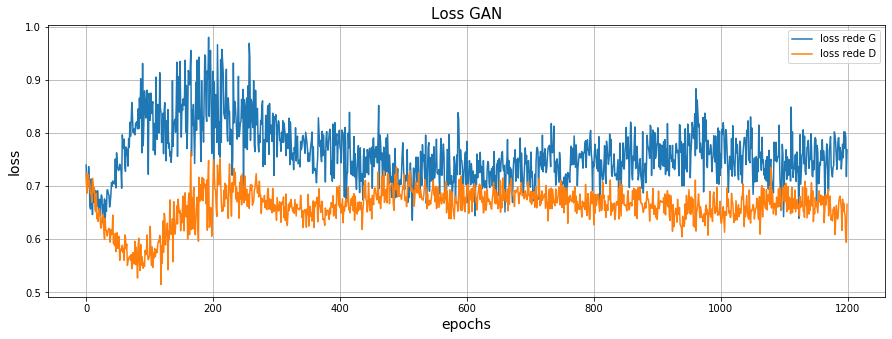

In [257]:
plt.figure(figsize=(15,5))
plt.title("Loss GAN", fontsize=15)
plt.plot(range(ep), g_loss, label="loss rede G")
plt.plot(range(ep), d_loss, label="loss rede D")
plt.xlabel("epochs", fontsize=14)
plt.ylabel("loss", fontsize=14)
plt.grid()
plt.legend();

(21, 2) (800, 2)


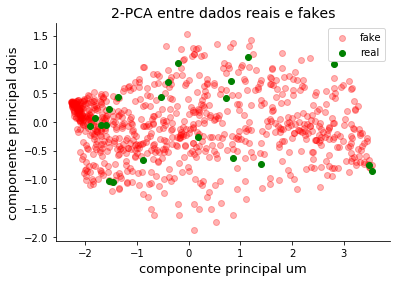

In [258]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
x_noise = G.predict(np.random.normal(loc=0, scale=1, size=(800,noise_input)))
X_fake_pca = pca_real.transform(x_noise)
print(X_train_pca.shape, X_fake_pca.shape)
plt.title("2-PCA entre dados reais e fakes", fontsize=14)
plt.xlabel("componente principal um", fontsize=13)
plt.ylabel("componente principal dois", fontsize=13)
plt.scatter(X_fake_pca[:,0], X_fake_pca[:,1], color="red", label="fake", alpha=0.3)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="green", label="real", alpha=1)
plt.legend();

In [261]:
fakes = G.predict(np.random.normal(0,1,(5000,noise_input)))
print("Dados fake: ", fakes.shape)
print()
D_predict_fake = D.predict_classes(fakes)
print("-------------- Discriminador com dados fake --------------")
print("porcentagem de dados que o discriminador acredita reais: ", np.round(np.mean(D_predict_fake==1),4))
print("porcentagem de dados que o discriminador acredita fakes: ", np.round(np.mean(D_predict_fake==0),4))
print()
D_predict_real = D.predict_classes(X_train)
print("-------------- Discriminador com dados reais --------------")
print("porcentagem de dados que o discriminador acredita reais: ", np.round(np.mean(D_predict_real==1),4))
print("porcentagem de dados que o discriminador acredita fakes: ", np.round(np.mean(D_predict_real==0),4))

Dados fake:  (5000, 9)

-------------- Discriminador com dados fake --------------
porcentagem de dados que o discriminador acredita reais:  0.2054
porcentagem de dados que o discriminador acredita fakes:  0.7946

-------------- Discriminador com dados reais --------------
porcentagem de dados que o discriminador acredita reais:  0.5238
porcentagem de dados que o discriminador acredita fakes:  0.4762
